In [5]:
import os
import numpy as np
import struct
import pandas as pd



def read_hog(filename, batch_size=5000):
    """
    Read HoG features file created by OpenFace.
    For each frame, OpenFace extracts 12 * 12 * 31 HoG features, i.e., num_features = 4464. These features are stored in row-major order.
    :param filename: path to .hog file created by OpenFacefi
    :param batch_size: how many rows to read at a time
    :return: is_valid, hog_features
        is_valid: ndarray of shape [num_frames]
        hog_features: ndarray of shape [num_frames, num_features]
    """
    all_feature_vectors = []
    with open(filename, "rb") as f:
        num_cols, = struct.unpack("i", f.read(4))
        num_rows, = struct.unpack("i", f.read(4))
        num_channels, = struct.unpack("i", f.read(4))

        # The first four bytes encode a boolean value whether the frame is valid
        num_features = 1 + num_rows * num_cols * num_channels
        feature_vector = struct.unpack("{}f".format(num_features), f.read(num_features * 4))
        feature_vector = np.array(feature_vector).reshape((1, num_features))
        all_feature_vectors.append(feature_vector)

        # Every frame contains a header of four float values: num_cols, num_rows, num_channels, is_valid
        num_floats_per_feature_vector = 4 + num_rows * num_cols * num_channels
        # Read in batches of given batch_size
        num_floats_to_read = num_floats_per_feature_vector * batch_size
        # Multiply by 4 because of float32
        num_bytes_to_read = num_floats_to_read * 4

        while True:
            bytes = f.read(num_bytes_to_read)
            # For comparison how many bytes were actually read
            num_bytes_read = len(bytes)
            assert num_bytes_read % 4 == 0, "Number of bytes read does not match with float size"
            num_floats_read = num_bytes_read // 4
            assert num_floats_read % num_floats_per_feature_vector == 0, "Number of bytes read does not match with feature vector size"
            num_feature_vectors_read = num_floats_read // num_floats_per_feature_vector

            feature_vectors = struct.unpack("{}f".format(num_floats_read), bytes)
            # Convert to array
            feature_vectors = np.array(feature_vectors).reshape((num_feature_vectors_read, num_floats_per_feature_vector))
            # Discard the first three values in each row (num_cols, num_rows, num_channels)
            feature_vectors = feature_vectors[:, 3:]
            # Append to list of all feature vectors that have been read so far
            all_feature_vectors.append(feature_vectors)

            if num_bytes_read < num_bytes_to_read:
                break

        # Concatenate batches
        all_feature_vectors = np.concatenate(all_feature_vectors, axis=0)

        # Split into is-valid and feature vectors
        is_valid = all_feature_vectors[:, 0]
        feature_vectors = all_feature_vectors[:, 1:]

        return is_valid, feature_vectors

In [6]:
def retrieve_file_locations_csv(path_base=str, train=bool):
    # create 2 lists: (1) file locations (2) video id's
    
    # multi path, iterate over folders
    if train==True:
        folder_numbers = range(1,7)
    if train==False:
        folder_numbers = range(1,3)
    file_locations = []
    video_id = []
    
    for i in folder_numbers:
        path = path_base + str(i)
        print(path)
        for file in os.listdir(path):
            if file.endswith(".csv"):
                file_locations.append(os.path.join(path, file))
                video_id.append(file)
                
    return file_locations, video_id


file_locations_train_csv, video_id_train_csv = retrieve_file_locations_csv("D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - train - ", train=True)
file_locations_val_csv, video_id_val_csv = retrieve_file_locations_csv("D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - val - ", train=False)


D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - train - 1
D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - train - 2
D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - train - 3
D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - train - 4
D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - train - 5
D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - train - 6
D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - val - 1
D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - val - 2


In [7]:
def retrieve_file_locations_hog(path_base=str, train=bool):
    # create 2 lists: (1) file locations (2) video id's
    
    # multi path, iterate over folders
    if train==True:
        folder_numbers = range(1,7)
    if train==False:
        folder_numbers = range(1,3)
    file_locations = []
    video_id = []
    
    for i in folder_numbers:
        path = path_base + str(i)
        print(path)
        for file in os.listdir(path):
            if file.endswith(".hog"):
                file_locations.append(os.path.join(path, file))
                video_id.append(file)
                
    return file_locations, video_id


file_locations_train_hog, video_id_train_hog = retrieve_file_locations_hog("D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - train - ", train=True)
file_locations_val_hog, video_id_val_hog = retrieve_file_locations_hog("D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - val - ", train=False)


D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - train - 1
D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - train - 2
D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - train - 3
D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - train - 4
D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - train - 5
D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - train - 6
D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - val - 1
D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - val - 2


In [8]:
#path = 'D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - val - 1\_0bg1TLPP-I.003.hog'
path = file_locations_train_hog[0]
valid, feature_vectors = read_hog(path, batch_size=5000)

# delete frames where no face is detected
feature_vectors = np.delete(feature_vectors, np.where(valid == -1), axis=0)
#train = np.mean(feature_vectors, axis=0)

#velocity
#feature_vectors = np.diff(feature_vectors)

feature_vectors.shape

(438, 4464)

In [16]:
from sklearn.decomposition import PCA
n_components = [1, 10, 20, 30, 50, 100, 200, 300, 500, 1000, 2000]
for i in n_components:
    print("number of PCA components: ", i)
    pca = PCA(n_components=200)
    pca.fit(feature_vectors)
    print(pca.explained_variance_ratio_.sum())

number of PCA components:  1
0.9752411137311406
number of PCA components:  10
0.9752399889322009
number of PCA components:  20
0.9752592484148974
number of PCA components:  30
0.9752411898616923
number of PCA components:  50
0.9752541166856988
number of PCA components:  100
0.9752581793930998
number of PCA components:  200
0.9752323169214655
number of PCA components:  300
0.9752439932552105
number of PCA components:  500
0.975239812213641
number of PCA components:  1000
0.9752414580557491
number of PCA components:  2000
0.9752454272640751


In [9]:
%%time
# find video lengths and make list. Otherwise we don't know how much principal components we can use per video. 
# The number of principal components is limited to the number of frames available for analysis.


def frames_per_vid(file_locations=list):
    frames = np.zeros((len(file_locations)))
    for i in range(len(file_locations)):
        df = pd.read_csv(file_locations[i])
        df = len(df[df[' success'] != 0])
        
        frames[i] = df
        
        if i%100 == 0:
            print(i)
    
    return frames
number_of_readable_frames_per_video_train = frames_per_vid(file_locations_train_csv)
number_of_readable_frames_per_video_val = frames_per_vid(file_locations_val_csv)
#
#np.save('number_readable_frames_train.py', number_of_readable_frames_per_video_train)
#np.save('number_readable_frames_val.py', number_of_readable_frames_per_video_val)

0
100


KeyboardInterrupt: 

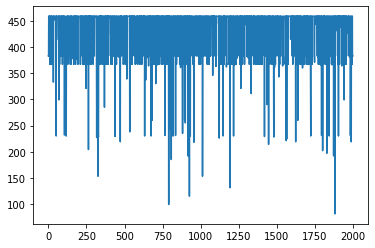

In [146]:
# plot usable frames

import matplotlib.pyplot as plt
plt.plot(number_of_readable_frames_per_video_val)

In [13]:
def hog_feature(pca_components, file_locations=list):

    path = file_locations[0]
    valid, feature_vectors = read_hog(path, batch_size=5000)
    
    # delete frames where no face is detected
    feature_vectors = np.delete(feature_vectors, np.where(valid == -1), axis=0)
    
    pca_components = pca_components
    data = np.zeros((len(file_locations),pca_components))
    #data_vel = 
    #data_accel = 
    for i in range(len(file_locations)):
    
        valid, feature_vectors = read_hog(file_locations[i], batch_size=5000)
        # delete frames where no face is detected
        feature_vectors = np.delete(feature_vectors, np.where(valid == -1), axis=0)   
        
        ##############################
        
        
        #feature engineering
        #data[i,:] = np.mean(feature_vectors, axis=0)
        pca = PCA(n_components=pca_components)
        pca.fit(feature_vectors)
        data[i,:] = pca.singular_values_
        print()
        
        ##velocity - feature_vectors = vel
        #feature_vectors = np.diff(feature_vectors)
        #data = np.hstack((train, np.mean(feature_vectors, axis=0))
        #
        ##acceleration - feature_vectors = accel
        #feature_vectors = np.diff(feature_vectors)
        #data = np.hstack((train, np.mean(feature_vectors, axis=0))
        
        if i%50 == 0:
            print(i) 
                          
    return data

train = hog_feature(pca_components = 10, file_locations = file_locations_train_hog) #>225 components gives problems because some videos have less than 230 frames
                       
#file_locations_val, file_locations_train

0
50
100


KeyboardInterrupt: 

In [ ]:
train

In [11]:
%%time
print(len(file_locations_train))
print(feature_vectors.shape)


train = np.zeros((len(file_locations_train),feature_vectors.shape[1]))
for i in range(len(file_locations_train)):
    
    valid, feature_vectors = read_hog(file_locations_train[i], batch_size=5000)
    # delete frames where no face is detected
    feature_vectors = np.delete(feature_vectors, np.where(valid == -1), axis=0)   
    
    ##############################
    
    
    #feature engineering
    #train[i,:] = np.mean(feature_vectors, axis=0)
    
    ######## WORK IN PROGRESS  ########  #velocity - feature_vectors = vel
    ######## WORK IN PROGRESS  ########  feature_vectors = np.diff(feature_vectors)
    ######## WORK IN PROGRESS  ########  train = np.hstack((train, np.mean(feature_vectors, axis=0))
    ######## WORK IN PROGRESS  ########  
    ######## WORK IN PROGRESS  ########  #acceleration - feature_vectors = accel
    ######## WORK IN PROGRESS  ########  feature_vectors = np.diff(feature_vectors)
    ######## WORK IN PROGRESS  ########  train = np.hstack((train, np.mean(feature_vectors, axis=0))
    
    if i%50 == 0:
        print(i) 

print(train.shape)

NameError: name 'file_locations_train' is not defined

In [19]:
#%%time
##single hog array
#print(len(file_locations_train))
#
#
#hog_full_train = []
#for i in range(len(file_locations_train[:50])):
#    
#    valid, feature_vectors = read_hog(file_locations_train[i], batch_size=5000)
#    # delete frames where no face is detected
#    feature_vectors = np.delete(feature_vectors, np.where(valid == -1), axis=0)   
#    
#    ##############################
#    
#    #print(feature_vectors.shape)
#    #fill array
#    hog_full_train.append(feature_vectors)
#    
#    ######## WORK IN PROGRESS  ########  #velocity - feature_vectors = vel
#    ######## WORK IN PROGRESS  ########  feature_vectors = np.diff(feature_vectors)
#    ######## WORK IN PROGRESS  ########  train = np.hstack((train, np.mean(feature_vectors, axis=0))
#    ######## WORK IN PROGRESS  ########  
#    ######## WORK IN PROGRESS  ########  #acceleration - feature_vectors = accel
#    ######## WORK IN PROGRESS  ########  feature_vectors = np.diff(feature_vectors)
#    ######## WORK IN PROGRESS  ########  train = np.hstack((train, np.mean(feature_vectors, axis=0))
#    
#    if i%10 == 0:
#        print(i) 
#
#print(train.shape)

6000
(438, 4464)
0
(383, 4464)
(459, 4464)
(459, 4464)
(449, 4464)
(459, 4464)
(383, 4464)
(457, 4464)
(445, 4464)
(459, 4464)
(459, 4464)
10
(459, 4464)
(459, 4464)
(459, 4464)
(383, 4464)
(367, 4464)
(459, 4464)
(459, 4464)
(459, 4464)
(459, 4464)
(367, 4464)
20
(383, 4464)
(459, 4464)
(367, 4464)
(367, 4464)
(459, 4464)
(333, 4464)
(459, 4464)
(457, 4464)
(459, 4464)
(459, 4464)
30
(459, 4464)
(383, 4464)
(459, 4464)
(454, 4464)
(459, 4464)
(459, 4464)
(459, 4464)
(459, 4464)
(459, 4464)
(459, 4464)
40
(459, 4464)
(459, 4464)
(383, 4464)
(459, 4464)
(453, 4464)
(459, 4464)
(455, 4464)
(438, 4464)
(459, 4464)
(4464,)
Wall time: 13.3 s


list

In [60]:
%%time
print(len(file_locations_val))


val = np.zeros((len(file_locations_val),feature_vectors.shape[1]))
for i in range(len(file_locations_val)):
    valid, feature_vectors = read_hog(file_locations_val[i], batch_size=5000)
    val[i,:] = np.mean(feature_vectors, axis=0)
    
    if i%10 == 0:
        print(i) 

print(val.shape)

2000
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
(2000, 4464)
Wall time: 6min 34s


In [6]:
##np.save('train_hog_mean', train)
#train = np.load('train_hog_mean.npy', allow_pickle=True)
##np.save('val_hog_mean', val)
#val = np.load('val_hog_mean.npy', allow_pickle=True)

In [10]:
print(train.shape)
print(val.shape)

(6000, 4464)
(2000, 4464)


In [20]:
#!pip install pympler
import sys
from pympler.asizeof import asizeof

#sys.getsizeof(hog_full_train[0])

asizeof(hog_full_train)/(1024**2)

746.3785400390625

# create target labels

In [9]:
import pandas as pd
def create_labels(pickle_file, file_locations):
    # training labels
    video_id = []
    interview_score = []
    for i in pickle_file['interview']:
        video_id.append(i)
        
    for video in video_id:
        interview_score.append(pickle_file['interview'][video])
    
    df_y = pd.DataFrame(
    {'video_id': video_id,
     'interview_score': interview_score,
    })
    
    df_y["video_id"] = df_y["video_id"].str.replace(".mp4", "")
    
    return df_y

train_labels = create_labels(pd.read_pickle('annotation_training.pkl'), file_locations_train)
val_labels = create_labels(pd.read_pickle('annotation_validation.pkl'), file_locations_val)
print(train_labels)

NameError: name 'file_locations_train' is not defined

In [63]:
## names
#special = '.hog' # that's better 
#
#video_id_train_loopy = video_id_train
#video_id_train_loopy[:] = [item.rstrip(special) for item in video_id_train]
#video_id_train_loopy
#
#video_id_train_loopy = train_labels[train_labels['video_id'].isin(video_id_train_loopy)]

# Predictions

In [110]:
#avg_ground_truth = np.mean(np.hstack((video_id_train_loopy.iloc[:,-1], val_labels.iloc[:,-1].values)))
#
#def performance(y_true, y_pred, avg_ground_truth):
#    score = (1/y_true.shape[0])*(np.sum(abs(y_true-y_pred)))/np.sum(abs(y_true-avg_ground_truth))
#    print(avg_ground_truth)
#    
#    return 1 - score

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# baseline 
dumb_prediction = 1 - mean_absolute_error(val_labels.iloc[:,-1].values, np.full((2000,), np.mean(train_labels.iloc[:,-1])))

dumb_prediction

0.8830107663551402

In [112]:
%%time
# multilinear regression

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(train, train_labels.iloc[:,-1] )

y_pred_lin = reg.predict(val)
1 - mean_absolute_error(val_labels.iloc[:,-1].values, y_pred_lin)

Wall time: 31 s


0.7312214548250426

In [113]:
%%time

#  SVR

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


svr = make_pipeline(StandardScaler(), SVR(C=1, kernel='rbf', epsilon=0.2))
svr.fit(train, train_labels.iloc[:,-1])
#Pipeline(steps=[('standardscaler', StandardScaler()),
#                ('svr', SVR(epsilon=0.2))])
y_pred_svr = svr.predict(val)
1 - mean_absolute_error(val_labels.iloc[:,-1].values, y_pred_lin)

Wall time: 45.7 s


0.7312214548250426

In [114]:
# PCA analysis
from sklearn.decomposition import PCA
n_list=[5,10,20,50,100,200,300,500]
for n in n_list:    
    pca = PCA(n_components=n)
    pca.fit(train)
    
    reduced_train = pca.transform(train)
    reduced_val = pca.transform(val)
    
    
    reg = LinearRegression().fit(reduced_train, train_labels.iloc[:,-1])
    y_pred_lin = reg.predict(reduced_val)
    print('pca = ', n,' components')
    print('method =  linear regression')
    print(1 - mean_absolute_error(val_labels.iloc[:,-1].values, y_pred_lin))
    print(35*'-')

pca =  5  components
method =  linear regression
0.8830310740236659
-----------------------------------
pca =  10  components
method =  linear regression
0.8829970648653779
-----------------------------------
pca =  20  components
method =  linear regression
0.8826562891515164
-----------------------------------
pca =  50  components
method =  linear regression
0.882396850581244
-----------------------------------
pca =  100  components
method =  linear regression
0.8818889674109338
-----------------------------------
pca =  200  components
method =  linear regression
0.8803429812389328
-----------------------------------
pca =  300  components
method =  linear regression
0.8790797847829075
-----------------------------------
pca =  500  components
method =  linear regression
0.8771371017040159
-----------------------------------


In [108]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# prepare the cross-validation procedure
cv = KFold(n_splits=2, random_state=1, shuffle=True)
# create model
model = LinearRegression()
# evaluate model
scores = cross_val_score(model, train, train_labels.iloc[:,-1], scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('neg mae: %.3f (%.3f)' % (mean(scores), std(scores)))

neg mae: -0.399 (0.004)


In [109]:
1+mean(scores)

0.6014534590105964

In [99]:
NUM_FOLDS = 2
kf = KFold(n_splits=NUM_FOLDS, shuffle=True, random_state=0)

y_oof = np.zeros(train.shape[0])
y_test = np.zeros((val.shape[0], NUM_FOLDS))

for f, (train_ind, val_ind) in enumerate(kf.split(train, train)):
    train_segment, val_segment = train[train_ind], train[val_ind]
    train_segment_label, val_segment_label= train_labels[train_ind], train_labels[val_ind]
    

    reg = LinearRegression()
    reg.fit(train_segment, train_segment_label)

    val_pred = reg.predict(val_segment)
    test_pred = reg.predict(val_labels) # val labels is actually test labels. Named the variable wrong, needs rework

    y_oof[val_ind] = val_pred
    y_test[:, f] = test_pred
    
df["pred_{}".format(target)] = y_oof
test_df[target] = y_test.mean(axis=1)

mae = mean_absolute_error(df[df[target].notnull()][target].values, df[df[target].notnull()]["pred_{}".format(target)].values)


print('mean absolute error:', np.round(mae, 4))


TypeError: '(slice(None, None, None), 1)' is an invalid key